# Homework 1: Numpy, Scipy, Pandas

### Due Monday Feb 5, 2018 @ 2pm


## #0: Get set up with your environment to work on and submit homework

a. Create a new homework repository at github

<img src="data/screenshot_1.png">

Name your repo something sensible (e.g., python-ay250-homeworks). Given your Berkeley affiliation you should be able to get private repos if you'd like.

<img src="data/screenshot_2.png">


b. Clone this repo locally and make a directory for this week's homework:

```bash
cd /class/directories ## this will be different on your machine...whereever you want to keep your work.

# change <username> to your github username:
git clone https://github.com/<username>/python-ay250-homework.git
cd python-ay250-homework
mkdir hw_1
echo "hw_1 README" >> hw_1/README.md
git add hw_1/README.md
git commit hw_1/README.md -m "added hw_1 directory"
git push
```

c. Copy this notebook into your `hw_1` folder from a local version of the python-seminar repo

```bash
cd /class/directories
git clone https://github.com/profjsb/python-seminar.git 
cd python-seminar
git pull
cp -r Homeworks/hw_1/* /class/directories/python-ay250-homework/hw_1/
```

d. Get working! Be sure to check in your work as often as you'd like

```bash
cd /class/directories/python-ay250-homework
git add hw_1/<whatever>
git commit <whatever> -m "this is a check in"
```

e. To submit your work, go to this form to register your homework Repo URL (https://goo.gl/forms/4DTPxonYBAxmfxJG2). If you've made your repo private, you'll need to add us as collaborators to the repo.  Our Github handles are `@profjsb` and `@chelseaharris`.

## #1:  Super-resolution imaging 

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="Data/im2-1.png">

A tarball of the data is at: https://drive.google.com/open?id=0B4vIeCR-xYNnbXFJTTVlVnpUZkk

```bash
tar -xvzf homework1_data.tgz  # do NOT check this files into git...
```

**Problem 1** Read in each image into a `numpy` array. Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.fftconvolve` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places. 

   - Hint1: you'll need to figure out how to resize a numpy array
   - Hint2: you'll want to reverse the second image when doing the convolution: `scipy.signal.fftconvolve(im1, im2[::-1, ::-1])`
   - Hint3: you'll need to figure out how to identify the peak of the fft convolution to find the offsets between images

In [1]:
%matplotlib inline
# %matplotlib notebook
import numpy as np
from scipy import ndimage
import os
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

def load_image(filename):  #method to load in images and manipulate appropriately
    #load in data from files
    file_extention = "data/car_data/"   #the images are stored in this directory (we are told not to check that into github)
    img  = ndimage.imread(file_extention + filename, mode ="L")
    #resize, crop, and normalize image
    img = sp.misc.imresize(img,300,interp = 'bilinear') 
    cropped_img = []
    for line in img:
        if not np.array_equal(line, 255*np.ones_like(line)):
            cropped_img.append(line)
    cropped_img += -np.mean(cropped_img)
    return cropped_img

reference = "im2-0.png"
reference_img = load_image(reference)
final_image = np.zeros_like(reference_img)
img_dict = {reference:reference_img}
shift_dict = {reference:[0,0]}
for file in os.listdir("data/car_data/"):
    img = load_image(os.fsdecode(file))  #load image
    convolve = signal.fftconvolve(reference_img,img[::-1,::-1],mode="same") #find convolution w/ first image
    center = np.unravel_index(convolve.argmax(),convolve.shape) #find the center of the image
    shift = [center[0]-len(img[0,:])/2,center[1]-len(img[:,0])/2] #change the center to an offset
    shift_dict.update({file:shift})  #store shift
    img_dict.update({file:img}) #store the image

print("Offsets for blown up images:",shift_dict)  #report shifts
    

/Users/Erik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  del sys.path[0]
/Users/Erik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


Offsets for blown up images: {'im2-0.png': [-146.0, 146.0], 'im2-1.png': [-138.0, 107.0], 'im2-10.png': [-42.0, 138.0], 'im2-11.png': [-89.0, -20.0], 'im2-12.png': [-84.0, 123.0], 'im2-13.png': [-121.0, 41.0], 'im2-14.png': [-90.0, 138.0], 'im2-15.png': [31.0, 127.0], 'im2-16.png': [-32.0, 179.0], 'im2-17.png': [-90.0, 74.0], 'im2-18.png': [-38.0, 50.0], 'im2-19.png': [-105.0, 122.0], 'im2-2.png': [-24.0, 139.0], 'im2-20.png': [-194.0, 65.0], 'im2-21.png': [-67.0, 37.0], 'im2-22.png': [-98.0, 49.0], 'im2-23.png': [-130.0, 39.0], 'im2-24.png': [-33.0, 83.0], 'im2-25.png': [-25.0, 84.0], 'im2-26.png': [-146.0, -21.0], 'im2-27.png': [-100.0, 195.0], 'im2-28.png': [-94.0, 202.0], 'im2-29.png': [-8.0, 146.0], 'im2-3.png': [32.0, 179.0], 'im2-30.png': [-65.0, 19.0], 'im2-31.png': [-33.0, 234.0], 'im2-32.png': [-64.0, 163.0], 'im2-33.png': [23.0, 89.0], 'im2-34.png': [-146.0, 34.0], 'im2-35.png': [-41.0, 146.0], 'im2-36.png': [13.0, 209.0], 'im2-37.png': [-47.0, 196.0], 'im2-38.png': [-91.0, 

**Problem 2** Shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets. You might want to look at `scipy.ndimage.interpolation.shift`

In [2]:
shifted_images= []
for key in shift_dict:
    shifted_image = ndimage.interpolation.shift(img_dict[key],shift_dict[key]) #shift the image appropriately
    shifted_images.append(shifted_image)

**Problem 3** Combine all the registered images to form a super-resolution image. What does the license plate read?

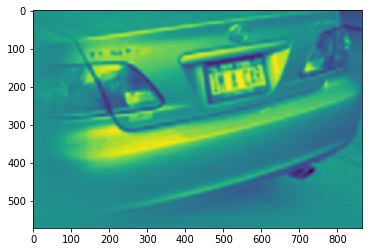

It says 'IM A CAR'!


In [3]:
final_image = reference_img/100
for img in shifted_images:  #sum all images
    final_image += img/100

plt.imshow(final_image)
plt.show()
    
print("It says \'IM A CAR\'!")

# #2: An elementary introduction to spectral audio compression

In this problem, we'll explore the very basics of audio compression in the spectral domain using numpy and scipy. We'll do a bit of visualization with matplotlib, but since that is covered later in the course, we'll provide those functions for you.

Audio compression is a large and complex topic, and the design of a format for compressed audio such as the popular [MP3](http://en.wikipedia.org/wiki/MP3) is too complex to cover in detail here. However, we will introduce the basic tools that most such compression formats use, namely:

1. Converting the input signal to the frequency domain by taking a Fast Fourier Transform (FFT).

2. Dropping information in the frequency domain, resulting in a smaller amount of data.

3. Reconstructing back the signal in the time domain from this smaller representation of the signal.

Steps 1 and 2 above are the 'encoding' part of signal compression, and step 3 is the 'decoding' part. For this reason, the tools that perform these steps are typically referred to as signal 'codecs', short for encoders/decoders.

Note that here we say 'signal': while MP3 is an audio format, the same ideas apply to the compression of digital images with formats such as JPEG and video.  Virtually all multimedia technologies we use today, from audio players to cell phones, digital cameras and YouTubeVideo, are based on sophisticated extensions and applications of these simple ideas.

Let's first load the plotting tools and importing some tools we'll need later:

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# we'll need some path manipulations later on
import os

Populating the interactive namespace from numpy and matplotlib


/Users/Erik/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['convolve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We define a simple utility function to listen to audio files right in the browser:

In [5]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

We also define a convenience wrapper around `plt.specgram`, [matplotlib's spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram), with a colorbar and control over the color limits displayed. This will make it easier to compare across different signals with the same colors for all inputs.

In [6]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x,Fs=2)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

**Problem 1**: Use the `Audio` function above to listen to the signal we will be experimenting with, a simple voice recording stored in the file `Homeworks/hw1/data/voice.wav`.

Note: if your browser doesn't support audio, you may try a different browser.   We've tested current versions of Chrome and Firefox, and it works OK with both.

In [7]:
# your code here

Audio("data/voice.wav")


**Problem 2**: Write a function to compress a 1-d signal by dropping a fraction of its spectrum. 

You can drop the smallest components by setting their values to zero.

*Hints*: 

- look at the `np.fft` module, keeping in mind that your input signal is real.
- look at the `argsort` method of numpy arrays.

In [8]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    freq_space = (np.fft.fft(x)) #find frequency space version of the time recording
    ordered_idxs = np.argsort(freq_space) #order the indexes of frequency space by intensity
    for i in ordered_idxs[:int(fraction*len(ordered_idxs))]: #set the indexes up to a certain fractions to 0
        freq_space[i] = 0
    comp_data = (np.fft.ifft(freq_space)) #reconvert the now compressed data to the time space
    
    return comp_data    

As a quick visual check (not that this is *not* a formal test of correctness), experiment with a simple random signal by changing the compression ratio and plotting both the signal and the compressed version:

In [9]:
x = np.random.rand(128)

/Users/Erik/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


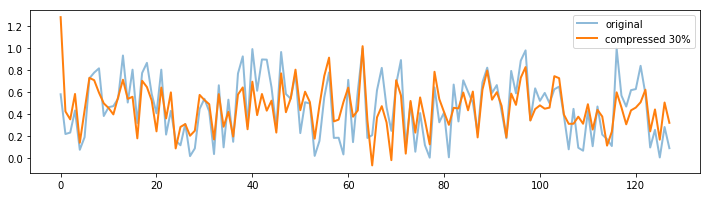

In [10]:
fraction = 0.3  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

**Problem 3**: Write a function that will compress an audio file by a dropping a fraction of its spectrum, writing the output to a new file.

If the input file is named `a.wav` and the compression fraction is 0.9, the output file should be named `a_comp_0.9.wav`.

*Hints:* 

- look at the `scipy.io` module for routines dealing with files in `wav` format.

- you may need to use the `astype` method of numpy arrays to get the correct data type for `wav` files.

In [11]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    import scipy.io.wavfile as w
    import numpy as np

    frate, wavedata = w.read(fname) #read in wave data
    new_wave = compress_signal(wavedata,fraction) #apply the compression function
    new_fname = fname[:-4] + "_comp_" + str(fraction) +".wav" #same the compressed array to a new file
    w.write(new_fname,frate,(new_wave).astype("int16")) #write new array w/ appropriate datatype
    
    return frate,wavedata, new_wave, new_fname


**Problem 4**: Study the effect of compressing the input file at different ratios: 0.1, 0.5, 0.75, 0.9, 0.95, 0.99.

Using the `OrderedDict` class from the [Python collections module](http://docs.python.org/2/library/collections.html#collections.OrderedDict), store the uncompressed signal as well as the compressed array and filename for each compression ratio.

You will create an `OrderedDict` called `voices`, with:

- keys: compression ratios
- values: pairs of (x, filename) where x is the compressed audio and filename is the name of the compressed file.

In [12]:
from collections import OrderedDict

comp_fracs = [0.0,0.1, 0.5, 0.75, 0.9, 0.95, 0.99] #compressions we want to save w/ 0.0 being the uncompressed version
voices = OrderedDict()
for el in comp_fracs:
    rate,old_data,new_data,filename = compress_wav("data/voice.wav",el)
    voices.update({el:(new_data,filename)}) #store compressed files in ordered dict

/Users/Erik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


**Problem 5**: Loop over the `voices` dict, and for each one generate an audio player as well as a spectrogram.  Observe how the spectrogram changes, and listen to each file.  At what ratio do you stop understanding the recording?

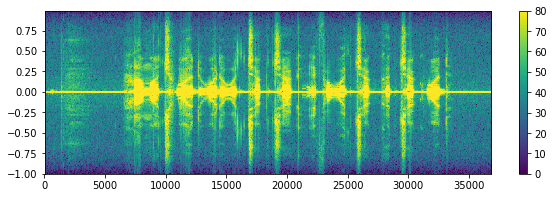

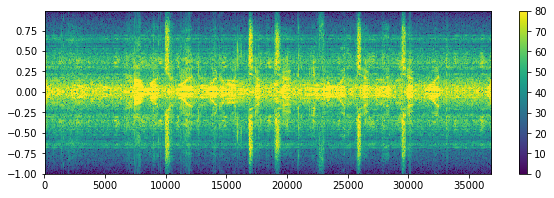

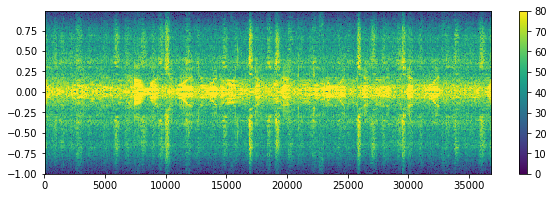

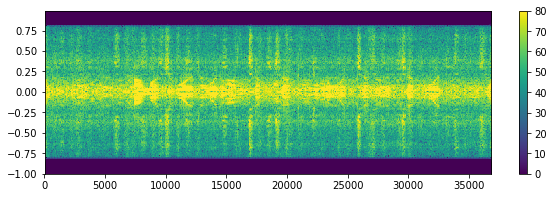

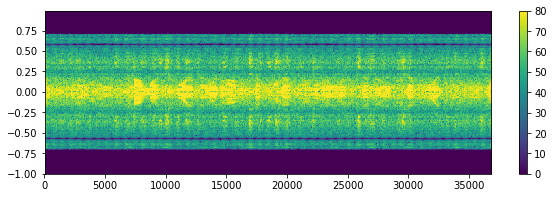

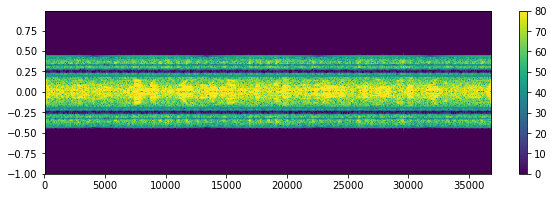

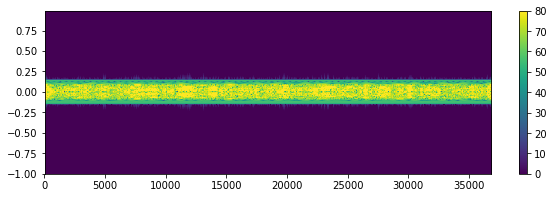

As compression increases, the voice of the original file gets quieter and more muddled.  You can see this happening in the spectrogram as the temporal frequency bands become less sharp and the width of the recording narrows. The background rises as well. A compression of 95% remains semi-audible but 99% sounds just like background noise w/ perhaps a very low sound that resembles the original phrase


In [13]:
# your code here

for key in voices: #loop over chosen compressions and play them
    array,filename = voices[key]
    specgram_cbar(array)
    Audio(filename)  
    
print("As compression increases, the voice of the original file gets quieter and more muddled.  You can see this happening in the spectrogram as the temporal frequency bands become less sharp and the width of the recording narrows. The background rises as well. A compression of 95% remains semi-audible but 99% sounds just like background noise w/ perhaps a very low sound that resembles the original phrase")

# #3: Armchair Astronomer

Often times, people act as good sensors of the physical universe. We can use Google Trends data to help us determine some fundamental parameters of the Solar System.

**Problem 1**: Using just the CSV file we created in the pandas lecture (`merged_data.csv`) and some frequency analysis tools in `scipy` to determine:

   - the number of days in a year
   - the period of the moon's orbit around the Earth
   
Hint: `from scipy.signal.spectral import lombscargle` (you'll want to normalize your signal so it has a mean of zero.)

In [14]:
# your code here

import pandas as pd
from datetime import datetime
from scipy.signal.spectral import lombscargle 
import matplotlib.pyplot as plt
import numpy as np

gdata = pd.read_csv('merged_data.csv') #read in data
gdata['Week'] = pd.to_datetime(gdata['Week']) #convert week to datetime
gdata.set_index('Week',inplace=True)
period_range = np.linspace(3,600,1000) #period range to investigate
delta_time = gdata.index - gdata.index[0] #find difference in times from start

for label in gdata: #remove DC offset of data
    gdata[label] = gdata[label]-np.mean(gdata[label])

periods ={}
for label in gdata: 
    ls = lombscargle(delta_time.days,gdata[label],2*np.pi/(period_range), normalize=True) #find frequency componants
    max_componant = np.argmax(ls) #identify index of strongest componant 
    period = period_range[max_componant] #find period associated with that index
    periods.update({label:period}) #save in a dictionary
    
days_in_year = int(np.mean([periods['Volleyball'],periods['ice cream'],periods['tennis']])) #calculate days in a year based off average of 3 yearly periodic terms
    
print("Google trends predicts that there are {} days in a year based of searches for tennis, ice cream, and volleyball".format(days_in_year))

moon_period = periods['full moon']
moon_period = format(moon_period, '.2f')

print("Google trends predicts that it takes the moon {} days to orbit the earth based of searches for the term \'full moon\'".format(moon_period))


Google trends predicts that there are 368 days in a year based of searches for tennis, ice cream, and volleyball
Google trends predicts that it takes the moon 29.29 days to orbit the earth based of searches for the term 'full moon'


# #4: Reproducing some insights about the Election

Nate ("not a genius, just a Bayesian") Silver writes often about polls and their utility of predicting elections. One of the things he emphasized during the 2016 campaign is that even "large" polls of people with a consistent lead for one candidate will show wild swings in any given window in time.

**Problem 1**: Using Pandas and `numpy`, try to reproduce this plot from a Nate Silver Tweet qualitatively using the same assumptions.

<img src="https://www.evernote.com/l/AUU-KkH3Z-lBdKokzCzVIUe53YZLQ9e_AuMB/image.png">

https://twitter.com/NateSilver538/status/769565612955824128

Text(0.5,0,'Date')

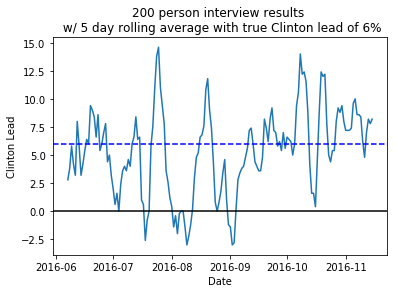

In [18]:
# your code here
import random
import pandas as pd

num_voters = 200 #daily voters sampled
clinton_lead = 6 #as a percentage

def get_vote(bias):  #function to randomly choose if a vote goes for one candiate or another assuming a certain lead
    if random.random() < 0.5+0.005*bias:
        return 1
    else:
        return -1

def run_interview(num_voters,true_bias): #a method to conduct one day's interview
    simulated_lead = 0
    for i in range(num_voters):
        simulated_lead += get_vote(true_bias) #calculates how many % points the true leader is polled as being up
    return (100*simulated_lead/(num_voters))

def create_poll(date_list,true_bias,num_voters): #runs a poll over a given date range and returns rolling 5 day average
    results = []
    for i in range(len(date_list)):
        results.append(run_interview(num_voters,true_bias)) #get results of interview

    rolling_avg = []
    for i,el in enumerate(results): #calculate 5 day rolling average
        if i > 5:
            rolling_avg.append(np.mean(results[i-5:i])) 
        else: rolling_avg.append(0) 
            
    poll = pd.DataFrame({'Date':date_list})
    poll['Rolling Average']=pd.Series(rolling_avg, index = poll.index)
    poll.set_index('Date',inplace=True)
    
    return poll

dates = pd.date_range(start="6/1/2016", end="11/15/2016",freq='d')
data=create_poll(dates,clinton_lead,num_voters)

plt.plot(data[6:])
plt.title("{} person interview results \n w/ 5 day rolling average with true Clinton lead of {}%".format(num_voters,clinton_lead))
plt.axhline(clinton_lead,color='blue',linestyle="--")
plt.axhline(0,color='black')
plt.ylabel("Clinton Lead")
plt.xlabel("Date")


**Problem 2**: Clearly, even with a 6% point lead, there's a chance that this sort of poll would show the other person in the lead. How much would ahead (in percent) would a candidate need to be to have a tracking poll never show the other candidate to be ahead over the course of a year (in your simulation)?

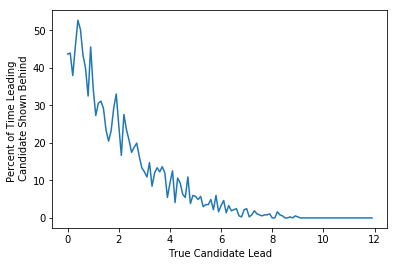

Over the course of one year, the leading candidate never trails in a 5 day rolling average first when their true bias is above 9.1%


In [21]:
# your code here
date_range = pd.date_range(start="11/15/2016", end="11/15/2017",freq='d') #one year
lead_range = np.arange(0,12,0.1)
num_voters =200

error_rate =[]
for l in lead_range:
    false_chance = 0 #number of days the leader is polled to be losing
    poll = create_poll(date_range,l,num_voters)
    false_chance= poll[poll['Rolling Average']<0].count()
    percent_wrong = 100*(float(false_chance)/len(poll-5))
    error_rate.append(percent_wrong)  #percent of days the leader is trailing

plt.plot(lead_range,error_rate)
plt.xlabel("True Candidate Lead")
plt.ylabel("Percent of Time Leading \n Candidate Shown Behind")
plt.show()

true_zero_idx = [i for i,el in enumerate(error_rate) if el != 0][-1] +1 #first index where the leading never trails again even at larger leads
print("Over the course of one year, the leading candidate never trails in a 5 day rolling average first when their true bias is above {}%".format(lead_range[true_zero_idx]))

**Problem 3**: With a 3 and 6% lead, how many people would need to be polled in 1 day to have the rolling 5-day poll result always show the leader ahead (over a year)?

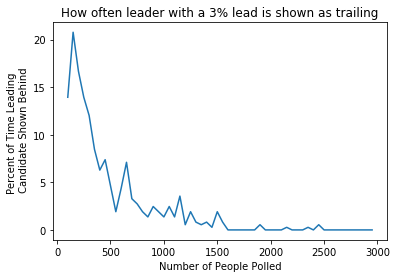

Over the course of 1 year, the 3% leading candidate never trails in a 5 day rolling average first when 2500 people are sampled per day


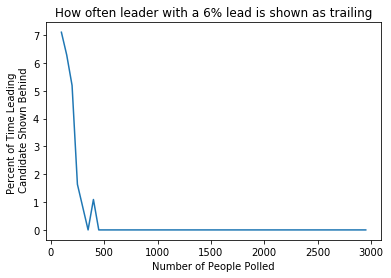

Over the course of 1 year, the 6% leading candidate never trails in a 5 day rolling average first when 450 people are sampled per day


In [23]:
# your code here
date_range = dates = pd.date_range(start="11/15/2016", end="11/15/2017",freq='d') #one year
voter_range =np.arange(100,3000,50)

true_lead = 3
error_rate =[]
for n in voter_range:
    false_chance = 0
    poll = create_poll(date_range,true_lead,n)
    false_chance= poll[poll['Rolling Average']<0].count()
    percent_wrong = 100*(float(false_chance)/len(poll-5))
    error_rate.append(percent_wrong)

plt.plot(voter_range,error_rate)
plt.xlabel("Number of People Polled")
plt.ylabel("Percent of Time Leading \n Candidate Shown Behind")
plt.title("How often leader with a {}% lead is shown as trailing".format(true_lead))
plt.show()

true_zero_idx = [i for i,el in enumerate(error_rate) if el != 0][-1] +1
print("Over the course of 1 year, the {}% leading candidate never trails in a 5 day rolling average first when {} people are sampled per day".format(true_lead,voter_range[true_zero_idx]))

true_lead = 6
error_rate =[]
for n in voter_range:
    false_chance = 0
    poll = create_poll(date_range,true_lead,n)
    false_chance= poll[poll['Rolling Average']<0].count()
    percent_wrong = 100*(float(false_chance)/len(poll-5))
    error_rate.append(percent_wrong)

plt.plot(voter_range,error_rate)
plt.xlabel("Number of People Polled")
plt.ylabel("Percent of Time Leading \n Candidate Shown Behind")
plt.title("How often leader with a {}% lead is shown as trailing".format(true_lead))
plt.show()

true_zero_idx = [i for i,el in enumerate(error_rate) if el != 0][-1] +1
print("Over the course of 1 year, the {}% leading candidate never trails in a 5 day rolling average first when {} people are sampled per day".format(true_lead,voter_range[true_zero_idx]))